In [1]:
# to organize the bike shops data from different sources
import ReviewData as RD

In [2]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
bikeways = RD.readBikeFacility()

In [4]:
bikeways.head()

,id,name,type,status,source,geom
0,951,None,Shared Use Path,Built,SPR,"LINESTRING (4256230.266 888843.222, 4256258.02..."
1,993,None,Shared Use Path,Built,SPR,"LINESTRING (4256387.264 889850.322, 4256435.45..."
2,3203,None,None,None,None,"LINESTRING (4264078.184 885097.225, 4264071.27..."
3,1,None,Paved Shoulder,Built,LCOG,"LINESTRING (4216611.495 857908.927, 4216569.84..."
4,2,Fox Hollow,Bike Route,Built,LCOG,"LINESTRING (4240496.355 857938.484, 4240518.05..."


In [5]:
eugbikeshops = RD.readEugeneBikeShops()

In [6]:
bikestores = RD.readBikeStores()

In [7]:
business = RD.readBusiness()

In [8]:
eugbikeshops.head()

,Name,geometry
0,Klink Cycles,POINT (4232902.330 889351.829)
1,REI - Recreational Equipment Inc.,POINT (4237930.863 881335.916)
2,Bicycle Way of Life - 2 Shops,POINT (4238656.305 880646.520)
3,Hutch's Bicycle Store,POINT (4238768.476 878957.079)
4,UO Bike Program Maintenance Shop,POINT (4244396.762 875505.342)


In [9]:
bikestores.head()

,OBJECTID,business_n,business_d,address,city,state,zip,zip_plus4,zip_full,county,...,location_3,location_4,lcog_corre,lcog_cor_1,address_ma,address_ge,address__1,address__2,date_row_i,geometry
0,493,Hutch s Bicycle,,960 Charnelton St,Eugene,OR,97401,3028,97401-3028,Lane,...,$1-2.5 Million,1846000,,,1,26961,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4238790.910 878943.296)
1,494,Hutch s Bicycle Store,,2100 Main St,Springfield,OR,97477,5070,97477-5070,Lane,...,"$500,000-1 Million",739000,,,1,130463,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4265516.035 876981.209)
2,4902,Life Cycle Bike Shop,,1733 Pearl St # B,Eugene,OR,97401,4163,97401-4163,Lane,...,$1-2.5 Million,1661000,,,1,1018884,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4240438.712 875716.287)
3,12187,Paul s Bicycle Way Of Life,,2480 Alder St,Eugene,OR,97405,3006,97405-3006,Lane,...,$1-2.5 Million,1108000,,,1,16335,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4242642.364 872729.713)
4,12189,Paul s Bicycle Way Of Life,,556 Charnelton St,Eugene,OR,97401,2647,97401-2647,Lane,...,$2.5-5 Million,3691000,,,1,26941,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4238844.725 880555.942)


In [10]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [11]:
bikeways.crs = "EPSG:2914"
bikeways = bikeways.to_crs(epsg=3857)

In [12]:
eugbikeshops = eugbikeshops.to_crs(epsg=3857)

In [13]:
bikestores = bikestores.to_crs(epsg=3857)

In [15]:
business.columns

Index(['biz_business_name', 'biz_business_desc', 'biz_address', 'biz_city',
       'biz_state', 'biz_zip', 'biz_zip_plus4', 'biz_zip_full', 'biz_county',
       'biz_carrier_route', 'biz_delivery_point_bar_code', 'biz_neighborhood',
       'biz_phone', 'biz_phone_toll_free', 'biz_fax', 'biz_website',
       'biz_primary_sic_code', 'biz_primary_sic_desc', 'biz_sic_code_1',
       'biz_sic_code_1_desc', 'biz_sic_code_2', 'biz_sic_code_2_desc',
       'biz_sic_code_3', 'biz_sic_code_3_desc', 'biz_sic_code_4',
       'biz_sic_code_4_desc', 'biz_naics_industry_code_group',
       'biz_naics_industry_desc', 'biz_primary_naics',
       'biz_primary_naics_desc', 'biz_naics_1', 'biz_naics_1_desc',
       'biz_naics_2', 'biz_naics_2_desc', 'biz_naics_3', 'biz_naics_3_desc',
       'biz_naics_4', 'biz_naics_4_desc', 'biz_cuisine_code',
       'biz_cuisine_code_desc', 'biz_location_employee_size_code',
       'biz_location_employee_size_range', 'biz_location_employee_size_actual',
       'biz_busi

In [18]:
sorted(list(business.biz_primary_sic_desc.unique()))

['Abortion Information & Services',
 'Abrasive Products (Mfrs)',
 'Accessories-Fashion',
 'Accommodations',
 'Accountants',
 'Accountants-Certified-General',
 'Accounting & Bookkeeping General Svc',
 'Acoustical Contractors',
 'Acoustical Materials-Manufacturers',
 'Acupuncture',
 'Addiction Treatment Centers',
 'Adhesives & Glues-Manufacturers',
 'Adhesives & Gluing Equipment-Mfrs',
 'Adjusters-Public',
 'Adoption Agencies',
 'Adult Care Facilities',
 'Adventure Vacations',
 'Advertising Marketing',
 'Advertising NEC',
 'Advertising-Agencies & Counselors',
 'Advertising-Computer',
 'Advertising-Direct Mail',
 'Advertising-Directory & Guide',
 'Advertising-Newspaper',
 'Advertising-Outdoor',
 'Advertising-Promotional',
 'Advertising-Specialties (Whls)',
 'Advertising-Television',
 'Advocacy Resources',
 'Aerospace Support Services-Technical',
 'Agricultural Construction',
 'Agricultural Products',
 'Air Balancing',
 'Air Cargo Service',
 'Air Conditioning Contractors & Systems',
 'Air 

In [19]:
BikeBusiness = business[business.biz_primary_sic_desc.isin(['Bicycle Fabricators (Mfrs)', 
                                                            'Bicycles-Dealers', 
                                                            'Bicycles-Repairing'])]

In [21]:
BikeBusiness = BikeBusiness.to_crs(epsg=3857)

In [23]:
BikeBusiness = gpd.clip(BikeBusiness, MPObd)

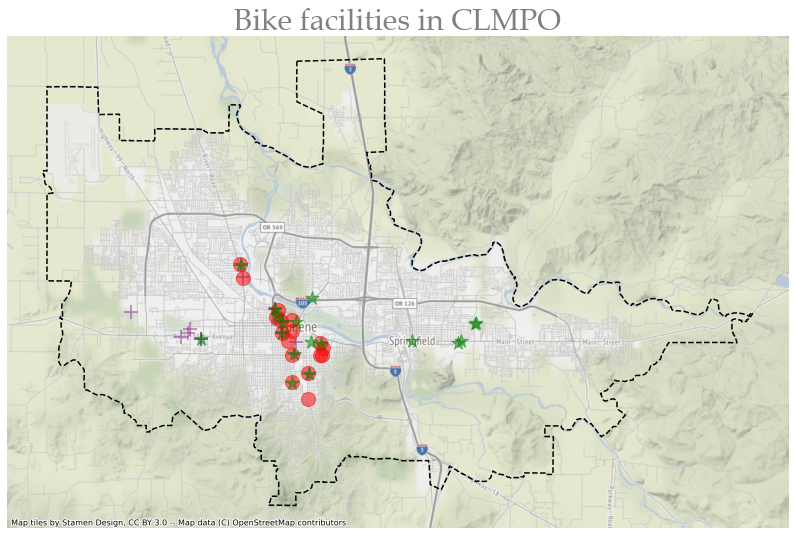

In [26]:
fig, ax = plt.subplots(figsize=(14, 12))
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
#bikeways.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
BikeBusiness.plot(ax=ax, marker='+', markersize=200, color='purple', alpha=.5, aspect=1)
eugbikeshops.plot(ax=ax, marker='o', markersize=200, color='red', alpha=.5, aspect=1)
bikestores.plot(ax=ax, marker='*', markersize=200, color='green', alpha=.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bike facilities in CLMPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");